In [2]:
import pandas as pd
import numpy as np
import numba as nb

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
column_names = pd.read_csv("allhypo-edit.names.txt")

In [5]:
list(column_names)

['age',
 ' sex',
 ' on thyroxine',
 ' query on thyroxine',
 ' on antithyroid medication',
 ' sick',
 ' pregnant',
 ' thyroid surgery',
 ' I131 treatment',
 ' query hypothyroid',
 ' query hyperthyroid',
 ' lithium',
 ' goitre',
 ' tumor',
 ' hypopituitary',
 ' psych',
 ' TSH measured',
 ' TSH',
 ' T3 measured',
 ' T3',
 ' TT4 measured',
 ' TT4',
 ' T4U measured',
 ' T4U',
 ' FTI measured',
 ' FTI',
 ' TBG measured',
 ' TBG',
 ' referral source',
 ' classes']

In [6]:
names = ['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source',
 'classes']

In [7]:
hypodata = pd.read_csv("allhypo.data.txt", header=None)

In [8]:
hypodata.columns = names

In [9]:
hypodata.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,classes
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [10]:
# split "classes" on ".|" to get class label  
hypodata_class = hypodata["classes"].str.split('.\|', 1, expand=True).rename(columns={0:'classes', 1:'id?'})

In [11]:
hypodata_class.head()

,classes,id?
0,negative,3733
1,negative,1442
2,negative,2965
3,negative,806
4,negative,2807


In [12]:
hypodata['classes'] = hypodata_class['classes']

In [13]:
hypodata.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,classes
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [14]:
hypodata.to_csv("hypodata_pd.csv", encoding='utf-8', index=False)

In [15]:
hypodata['TBG'].describe()

count     2800
unique       1
top          ?
freq      2800
Name: TBG, dtype: object

In [16]:
# drop 'TBG' column which contains no value. 
hypodata.drop(labels=['TBG', 'TBG measured'], axis=1, index=None, columns=None, level=None, inplace=True, errors='raise')

In [17]:
hypodata.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,classes
0,41,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,2,t,102,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,?,t,109,t,0.91,t,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61,t,0.87,t,70,SVI,negative


In [18]:
hypodata['FTI'].describe()

count     2800
unique     210
top          ?
freq       295
Name: FTI, dtype: object

In [19]:
hypodata['T3'].describe()

count     2800
unique      65
top          ?
freq       585
Name: T3, dtype: object

In [20]:
hypodata['TSH'].describe()

count     2800
unique     264
top          ?
freq       284
Name: TSH, dtype: object

In [21]:
hypodata['TT4'].describe()

count     2800
unique     218
top          ?
freq       184
Name: TT4, dtype: object

In [22]:
hypodata['T4U'].describe()

count     2800
unique     139
top          ?
freq       297
Name: T4U, dtype: object

In [23]:
repl = {"?": np.nan, "f":0, "t": 1, "F": 0, "M":1}

In [24]:
hypodata.replace(to_replace=repl, value=None, inplace=True, limit=None, regex=False, method='pad')

In [25]:
hypodata.head(5).transpose()

,0,1,2,3,4
age,41,23,46,70,70
sex,0,0,1,0,0
on thyroxine,0,0,0,1,0
query on thyroxine,0,0,0,0,0
on antithyroid medication,0,0,0,0,0
sick,0,0,0,0,0
pregnant,0,0,0,0,0
thyroid surgery,0,0,0,0,0
I131 treatment,0,0,0,0,0
query hypothyroid,0,0,0,0,0


In [26]:
y_class = {'negative': 0, 'primary hypothyroid': 1,
      'compensated hypothyroid':2, 'secondary hypothyroid': 3 }

In [27]:
hypodata['classes'].replace(to_replace=y_class, inplace=True)

In [28]:
# change numeric data type from string to float
tofloat = ['age','sex','TSH', 'T3', 'TT4', 'T4U', 'FTI']
hypodata[tofloat] = hypodata[tofloat].astype(float)

#### about 10% "FTI" data are missing. Fill the missing data with mean value. Other numeric columns also have relatively small % of missing values

In [29]:
rep_lst = ['age','sex','TSH', 'T3', 'TT4', 'T4U', 'FTI']
hypodata[rep_lst].mean().round(3)

age     51.844
sex      0.320
TSH      4.672
T3       2.025
TT4    109.072
T4U      0.998
FTI    110.788
dtype: float64

In [30]:
# replacing missing numerical data with the means. 

rep_val = [51.8, 0.320, 4.672, 2.025, 109.072, 0.998, 110.788]
for i in range(len(rep_val)):
    hypodata[rep_lst[i]].fillna(value = rep_val[i], inplace=True) 

In [31]:
hypodata[rep_lst][:4]

,age,sex,TSH,T3,TT4,T4U,FTI
0,41.0,0.0,1.30,2.500,125.0,1.140,109.000
1,23.0,0.0,4.10,2.000,102.0,0.998,110.788
2,46.0,1.0,0.98,2.025,109.0,0.910,120.000
3,70.0,0.0,0.16,1.900,175.0,0.998,110.788


In [32]:
hypodata.head()    

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,classes
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,2.500,1,125.0,1,1.140,1,109.000,SVHC,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,1,2.000,1,102.0,0,0.998,0,110.788,other,0
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0,2.025,1,109.0,1,0.910,1,120.000,other,0
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1,1.900,1,175.0,0,0.998,0,110.788,other,0
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,1.200,1,61.0,1,0.870,1,70.000,SVI,0


In [33]:
ref_source = {'other': 0, 'SVI': 1, 'SVHD': 2, 'SVHC': 3, 'STMW': 4}

In [34]:
hypodata['referral source'].replace(to_replace=ref_source, value=None, inplace=True, limit=None, regex=False, method='pad')

In [35]:
hypodata.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,classes
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,2.500,1,125.0,1,1.140,1,109.000,3,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,1,2.000,1,102.0,0,0.998,0,110.788,0,0
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0,2.025,1,109.0,1,0.910,1,120.000,0,0
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1,1.900,1,175.0,0,0.998,0,110.788,0,0
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,1.200,1,61.0,1,0.870,1,70.000,1,0


In [36]:
hypodata.to_csv("hypodata_clean.csv", encoding='utf-8', index=False)

In [37]:
hypodata.drop(labels=['TSH measured','T3 measured','TT4 measured','T4U measured', 'FTI measured'],axis=1, inplace=True)

In [38]:
### data normalization with (x-mean)/std
def data_scaling(df, scaling_col):
    df.loc[:,scaling_col] = (df.loc[:,scaling_col]-df.loc[:, scaling_col].mean())/df.loc[:, scaling_col].std()
    return df   

In [39]:
scaling_lst = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
data_scaling(hypodata, scaling_lst);

In [40]:
hypodata.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,classes
0,-0.530085,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.165852,0.647720,0.465593,0.773057,-5.748624e-02,3,0
1,-1.409958,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.028139,-0.034052,-0.206738,0.000428,4.593057e-07,0,0
2,-0.285676,1.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.181591,0.000037,-0.002116,-0.478385,2.961791e-01,0,0
3,0.887488,0.0,1,0,0,0,0,0,0,0,...,0,0,0,-0.221921,-0.170406,1.927181,0.000428,4.593057e-07,0,0
4,0.887488,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.194378,-1.124887,-1.405240,-0.696027,-1.311391e+00,1,0


In [41]:
hypodata.to_csv("hypodata_clean_scaled.csv", encoding='utf-8', index=False)

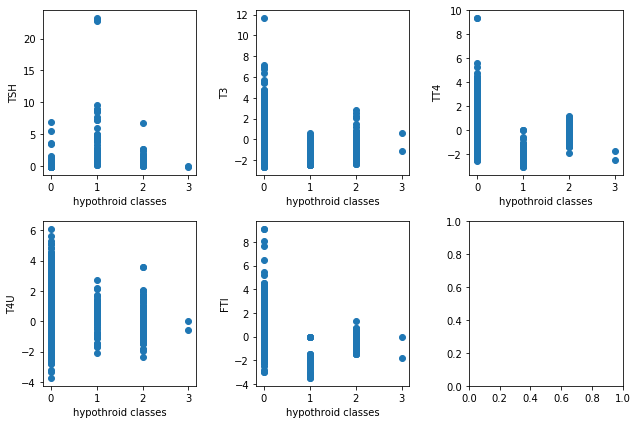

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
ax[0, 0].scatter(hypodata["classes"], hypodata["TSH"])
ax[0, 0].set_xscale("linear")
ax[0, 0].set_ylabel('TSH')
ax[0, 0].set_xlabel('hypothroid classes')
ax[0, 1].scatter(hypodata["classes"], hypodata["T3"])
ax[0, 1].set_xscale("linear")
ax[0, 1].set_ylabel('T3')
ax[0, 1].set_xlabel('hypothroid classes')
ax[0, 2].scatter(hypodata["classes"], hypodata["TT4"])
ax[0, 2].set_xscale("linear")
ax[0, 2].set_ylabel('TT4')
ax[0, 2].set_xlabel('hypothroid classes')
ax[1, 0].scatter(hypodata["classes"], hypodata["T4U"])
ax[1, 0].set_xscale("linear")
ax[1, 0].set_ylabel('T4U')
ax[1, 0].set_xlabel('hypothroid classes')
ax[1, 1].scatter(hypodata["classes"], hypodata["FTI"])
ax[1, 1].set_xscale("linear")
ax[1, 1].set_ylabel('FTI')
ax[1, 1].set_xlabel('hypothroid classes')
plt.tight_layout()
plt.savefig("thyroid hormones.png", dpi=300)
### TSH are higher in class 1
### T3 levels are lower in class 1, 2 and 3
### TT4 levels are lower in class 1, 2 and 3
### FTI levels are lower in class 1, 2 and 3